In [ ]:
#Importing python libraries

import pandas as pd # Pandas for Data Manipulation
import numpy as np # Numerical Python for Numerical data
import matplotlib.pyplot as plt # Data visualizations
import seaborn as sns # Data Visualizations

In [ ]:
# Load Dataset

df = pd.read_csv("https://raw.githubusercontent.com/superbaw/Machine-Learning-for-Psychology/7da1b3a720ea029931cbcaf09837ab19eae7c16d/Board%20Exam.csv")
df.head # DataFrame, .head .tail, .sample

<bound method NDFrame.head of     Board Exam Result  Math Grade  English Grade  Science Grade  \
0              Failed          68             66             73   
1              Passed          92             91             74   
2              Passed          86             74             93   
3              Passed          84             86             88   
4              Passed          85             87             84   
..                ...         ...            ...            ...   
495            Failed          66             69             67   
496            Passed          92             85             80   
497            Passed          85             87             81   
498            Passed          86             82             73   
499            Passed          88             89             83   

    Scholar Status Working Student Status  
0      Not Scholar        Working Student  
1          Scholar        Working Student  
2          Scholar    Not Working Student  
3          Scholar    Not Working Student  
4          Scholar        Working Student  
..             ...                    ...  
495    Not Scholar    Not Working Student  
496    Not Scholar        Working Student  
497    Not Scholar    Not Working Student  
498    Not Scholar        Working Student  
499    Not Scholar    Not Working Student  

[500 rows x 6 columns]>

In [ ]:
#Checking of missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Board Exam Result       500 non-null    object
 1   Math Grade              500 non-null    int64 
 2   English Grade           500 non-null    int64 
 3   Science Grade           500 non-null    int64 
 4   Scholar Status          500 non-null    object
 5   Working Student Status  500 non-null    object
dtypes: int64(3), object(3)
memory usage: 23.6+ KB


In [ ]:
# Find the Missing Data

df.isnull().sum() # magbilang ng missing data

Board Exam Result         0
Math Grade                0
English Grade             0
Science Grade             0
Scholar Status            0
Working Student Status    0
dtype: int64

In [ ]:
# Removing missing values

df = df.dropna()
df.isnull().sum()

Board Exam Result         0
Math Grade                0
English Grade             0
Science Grade             0
Scholar Status            0
Working Student Status    0
dtype: int64

In [ ]:
#To further check if there is an entry in a data such as "." for data cleaning

df[df['Math Grade'] == '.']

,Board Exam Result,Math Grade,English Grade,Science Grade,Scholar Status,Working Student Status


In [ ]:
# check number of classes, unique values under Board Exam column

df['Board Exam Result'].unique()

array(['Failed', 'Passed'], dtype=object)

In [ ]:
# Descriptive Statistics

df[df['Board Exam Result'] == 'Passed'].groupby('Scholar Status').describe().T

Scholar Status       Not Scholar     Scholar
Math Grade    count   119.000000  138.000000
              mean     87.369748   86.376812
              std       5.734028    6.048711
              min      74.000000   74.000000
              25%      83.000000   82.000000
              50%      87.000000   87.000000
              75%      91.000000   91.000000
              max      99.000000   99.000000
English Grade count   119.000000  138.000000
              mean     85.554622   84.420290
              std       6.431777    5.860684
              min      72.000000   71.000000
              25%      81.000000   80.250000
              50%      86.000000   85.000000
              75%      90.000000   88.000000
              max      99.000000   97.000000
Science Grade count   119.000000  138.000000
              mean     83.865546   83.818841
              std       6.320433    6.241181
              min      72.000000   72.000000
              25%      80.000000   79.000000
              50%      83.000000   84.000000
              75%      88.000000   88.000000
              max      99.000000   98.000000

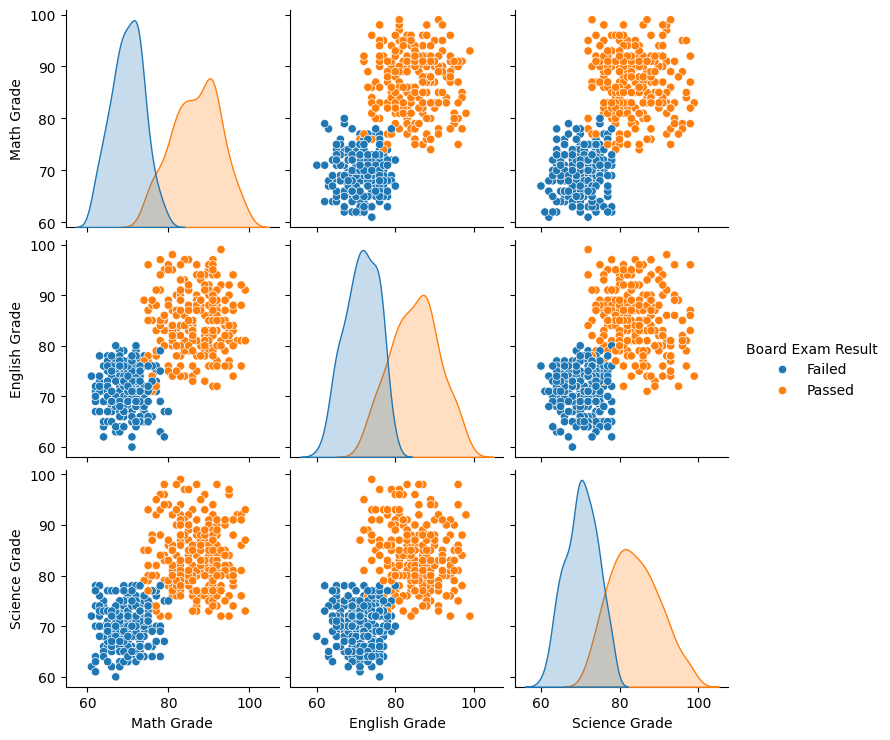

In [ ]:
# Generating pairplots

sns.pairplot(df, hue = 'Board Exam Result')

In [ ]:
#3d pairplot

import plotly.express as px
fig = px.scatter_3d(df, x='Math Grade', y='English Grade', z='Science Grade', color='Board Exam Result')
fig.show()


In [ ]:
# Multiple Categorical Features
# preprocess the data by encoding categorical features and separating the features from the target variable

X = pd.get_dummies(df.drop('Board Exam Result', axis = 1), drop_first = True) # label encoding 0, 1
y = df['Board Exam Result']

In [ ]:
# train - test split
# split the dataset into training and testing subsets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109) #Yung random state ay any random number. But for lecture purposes, let us use the same random state


In [ ]:
# Instance Model
# train a Decision Tree classifier using the training data

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 109)
model.fit(X_train, y_train) # Training ng model

DecisionTreeClassifier(random_state=109)

In [ ]:
# base Predictions (Default Settings)
# obtain predictions from the trained Decision Tree classifier on the testing data

base_preds = model.predict(X_test) # Prediction (based from X_test)
base_preds

array(['Passed', 'Failed', 'Failed', 'Passed', 'Failed', 'Failed',
       'Failed', 'Failed', 'Failed', 'Failed', 'Passed', 'Passed',
       'Failed', 'Failed', 'Passed', 'Failed', 'Passed', 'Failed',
       'Passed', 'Failed', 'Passed', 'Passed', 'Failed', 'Failed',
       'Failed', 'Failed', 'Failed', 'Failed', 'Passed', 'Passed',
       'Passed', 'Passed', 'Passed', 'Passed', 'Passed', 'Passed',
       'Passed', 'Failed', 'Failed', 'Failed', 'Failed', 'Failed',
       'Passed', 'Passed', 'Failed', 'Passed', 'Failed', 'Passed',
       'Failed', 'Failed', 'Failed', 'Passed', 'Passed', 'Passed',
       'Passed', 'Passed', 'Passed', 'Failed', 'Passed', 'Passed',
       'Passed', 'Failed', 'Passed', 'Failed', 'Passed', 'Passed',
       'Failed', 'Passed', 'Passed', 'Passed', 'Failed', 'Passed',
       'Passed', 'Passed', 'Passed', 'Passed', 'Passed', 'Passed',
       'Failed', 'Failed', 'Failed', 'Passed', 'Passed', 'Failed',
       'Failed', 'Failed', 'Failed', 'Failed', 'Passed', 'Pass

In [ ]:
# Classification Report

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Failed       0.99      1.00      0.99        75
      Passed       1.00      0.99      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



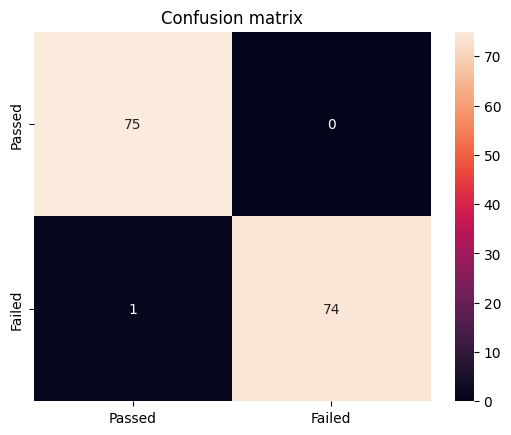

In [ ]:
# Confusion matrix

cm = confusion_matrix(y_test, base_preds)
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = ['Passed', 'Failed'],
            yticklabels = ['Passed', 'Failed'], cbar = True).set(title = 'Confusion matrix')
plt.show()


In [ ]:
# Decision Tree Model Attributes

#model.feature_importances_

# provide insights into which features are most important for the trained Decision Tree classifier's decision-making process

ft = pd.DataFrame(index = X.columns, columns = ['Feature Importance'],
                  data = model.feature_importances_) # eto ay gagawa ka ng table
ft.sort_values(by = 'Feature Importance', ascending = False) # Eto ang pang sort ng values in descendin order

,Feature Importance
Math Grade,0.818564
Science Grade,0.154795
English Grade,0.026641
Scholar Status_Scholar,0.000000
Working Student Status_Working Student,0.000000


In [ ]:
# This is how to do a text representation of decision trees 9text version)

from sklearn import tree

text_representation = tree.export_text(model, feature_names = X.columns.tolist())
print(text_representation)

|--- Math Grade <= 75.50
|   |--- Science Grade <= 78.50
|   |   |--- class: Failed
|   |--- Science Grade >  78.50
|   |   |--- class: Passed
|--- Math Grade >  75.50
|   |--- Science Grade <= 71.00
|   |   |--- class: Failed
|   |--- Science Grade >  71.00
|   |   |--- Math Grade <= 77.50
|   |   |   |--- English Grade <= 77.00
|   |   |   |   |--- Science Grade <= 82.00
|   |   |   |   |   |--- class: Failed
|   |   |   |   |--- Science Grade >  82.00
|   |   |   |   |   |--- class: Passed
|   |   |   |--- English Grade >  77.00
|   |   |   |   |--- class: Passed
|   |   |--- Math Grade >  77.50
|   |   |   |--- English Grade <= 69.50
|   |   |   |   |--- class: Failed
|   |   |   |--- English Grade >  69.50
|   |   |   |   |--- class: Passed



In [ ]:
# Tree Visualization (Graphical)

from sklearn.tree import plot_tree # Implementation, left 9true), right (false)

plt.figure(figsize = (15,10), dpi = 1000) # Pang set ng figure size
plot_tree(model, feature_names = X.columns, filled = True,
          class_names = ['Passed','Failed']);

# see classification report for class arrangement